## Necessary libraries/packages

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

## Demographics

In [3]:
demo = pd.read_csv('/content/drive/MyDrive/Capstone/demographic_info.csv')


In [4]:
demo

,Age,Height_cm,Weight_kg,Gender,Dominant_Hand,Patient_ID
0,28,178,76,male,right,S10
1,28,184,74,male,right,S7
2,27,170,66,male,right,S6
3,26,171,54,female,right,S11
4,26,181,75,male,right,S9
5,24,184,69,male,right,S16
6,27,180,80,male,right,S14
7,27,172,64,female,left,S8
8,28,186,83,male,right,S15
9,28,181,82,male,right,S13


In [5]:
demo['Gender'].value_counts()

,count
Gender,
male,12
female,3


In [6]:
demo.Age.value_counts()

,count
Age,
27,5
28,4
26,2
24,1
25,1
35,1
29,1


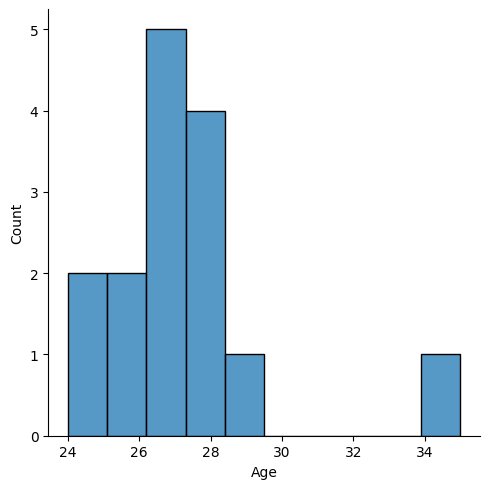

In [7]:
sns.displot(demo, x="Age")

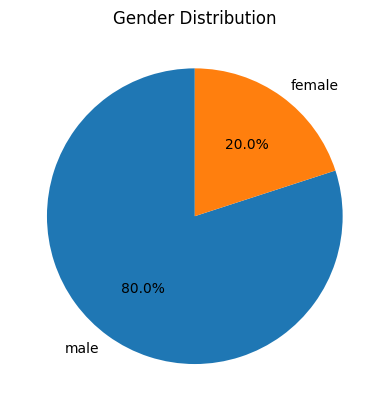

In [8]:
plt.pie(demo['Gender'].value_counts(),labels=demo['Gender'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

## Predictions

In [9]:
# Script to apply the provided best static models for 4 prediction tasks and generate predictions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv")

# Define feature columns
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count',
    'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF',
    'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]

# Drop invalid rows
df = df.drop(columns="HRV_SDANN")
df = df.dropna(subset=['Stress_label', 'Anxiety_Level', 'PANAS_PA', 'PANAS_NA'])
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Normalize features
scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

X = df[feature_cols].values

# Store predictions
preds_df = df[["Patient_ID"]].copy()
preds_df["index"] = preds_df.index

# Fit and predict with each static model
# 1. Stress (Random Forest - classification)
model_stress = RandomForestClassifier(n_estimators=100, max_depth=None)
model_stress.fit(X, df["Stress_label"])
preds_df["Stress_label_pred_static"] = model_stress.predict(X)

# 2. Anxiety (SVM - classification)
model_anxiety = SVC(C=10.0, kernel="linear", probability=True)
model_anxiety.fit(X, df["Anxiety_Level"])
preds_df["Anxiety_Level_pred_static"] = model_anxiety.predict(X)

# 3. PA (LightGBM - regression)
model_pa = LGBMRegressor(max_depth=5, learning_rate=0.01, n_estimators=50, reg_lambda=1.0)
model_pa.fit(X, df["PANAS_PA"])
preds_df["PANAS_PA_pred_static"] = model_pa.predict(X)

# 4. NA (XGBoost - regression)
model_na = XGBRegressor(learning_rate=0.01, max_depth=3, n_estimators=50, reg_lambda=5, subsample=0.7)
model_na.fit(X, df["PANAS_NA"])
preds_df["PANAS_NA_pred_static"] = model_na.predict(X)

# Save predictions
preds_df.to_csv("/content/drive/MyDrive/Capstone/static_predictions.csv", index=False)
print("✅ Static predictions saved to static_predictions.csv")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 842, number of used features: 11
[LightGBM] [Info] Start training from score 24.706651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [10]:
# Create a script to run best temporal models on time-windowed data for all 4 targets and save predictions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from lightgbm import LGBMClassifier
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv")
df.drop(columns='HRV_SDANN', inplace=True)

# Define constants
window_size = 10
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count', 'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF', 'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]

targets = {
    "Stress_label": LGBMClassifier(n_estimators=50, max_depth=-1),
    "Anxiety_Level": LGBMClassifier(n_estimators=50, max_depth=10),
    "PANAS_PA": LinearRegression(),
    "PANAS_NA": SVR(C=10.0, epsilon=1.0, kernel='linear')
}

# Store all predictions
all_preds = []

# Generate features and predict for each target
for target, model in targets.items():
    X_all, y_all, patient_ids, indices = [], [], [], []

    for patient_id, group in df.groupby("Patient_ID"):
        group = group.reset_index()
        group = group.dropna(subset=[target])
        group = group.replace([np.inf, -np.inf], np.nan).dropna(subset=feature_cols)
        if len(group) <= window_size:
            continue

        scaler = MinMaxScaler()
        group[feature_cols] = scaler.fit_transform(group[feature_cols])

        for i in range(window_size, len(group)):
            window_feat = group.iloc[i - window_size:i][feature_cols].values[:-1].flatten()
            past_labels = group.iloc[i - window_size:i][target].values[:-1] if "PANAS" not in target else []
            full_features = np.concatenate([window_feat, past_labels]) if len(past_labels) > 0 else window_feat
            X_all.append(full_features)
            y_all.append(group.iloc[i][target])
            patient_ids.append(patient_id)
            indices.append(group.iloc[i]["index"])

    X_all = np.array(X_all)
    y_all = np.array(y_all)

    model.fit(X_all, y_all)
    y_pred = model.predict(X_all)

    pred_df = pd.DataFrame({
        "Patient_ID": patient_ids,
        "index": indices,
        f"{target}_pred": y_pred
    })
    all_preds.append(pred_df)

# Merge all prediction dataframes
from functools import reduce
merged_preds = reduce(lambda left, right: pd.merge(left, right, on=["Patient_ID", "index"], how="outer"), all_preds)

# Save to CSV
merged_preds.to_csv("/content/drive/MyDrive/Capstone/temporal_predictions.csv", index=False)
print("✅ Temporal predictions saved to temporal_predictions.csv")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22383
[LightGBM] [Info] Number of data points in the train set: 692, number of used features: 108
[LightGBM] [Info] Start training from score -0.583749
[LightGBM] [Info] Start training from score -1.097168
[LightGBM] [Info] Start training from score -2.222098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22383
[LightGBM] [Info] Number of data points in the train set: 692, number of used features: 108
[LightGBM] [Info] Start training from score -0.956090
[LightGBM] [Info] Start training from score -1.470682
[LightGBM] [Info] Start training from score -0.952337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Temporal predictions saved to temporal_predictions.csv


In [11]:
import pandas as pd

static = pd.read_csv("/content/drive/MyDrive/Capstone/static_predictions.csv")
temporal = pd.read_csv("/content/drive/MyDrive/Capstone/temporal_predictions.csv")
combined = pd.merge(static, temporal, on=["Patient_ID", "index"], how="outer")
combined.to_csv("/content/drive/MyDrive/Capstone/merged_static_temporal_predictions.csv", index=False)
print("✅ Merged predictions saved!")

✅ Merged predictions saved!


## Visualization

In [12]:
!pip install plotly --upgrade
import plotly.io as pio
pio.renderers.default = "colab"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [13]:
# Re-saving the updated sliding window visualization script after kernel reset

import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider, Dropdown, Checkbox


# Load labeled dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv')
df = df.rename(columns={"Time_Split": "index"})  # Standardize index for merging

# Define feature and label columns
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count',
    'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF',
    'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]
label_cols = {
    'Stress': 'Stress_label',
    'Anxiety': 'Anxiety_Level',
    'PA (Positive Affect)': 'PANAS_PA',
    'NA (Negative Affect)': 'PANAS_NA'
}

# Try to load merged predictions (static + temporal)
try:
    preds_df = pd.read_csv('/content/drive/MyDrive/Capstone/merged_static_temporal_predictions.csv')
    preds_loaded = True
except:
    preds_df = None
    preds_loaded = False

# Drop rows with missing values
df = df.dropna(subset=feature_cols + list(label_cols.values()) + ['Patient_ID'])

# Define the visualization function
def plot_window(patient_id, window_start, target_name, show_preds):
    label_col = label_cols[target_name]
    patient_df = df[df['Patient_ID'] == patient_id].reset_index(drop=True)

    if len(patient_df) < 10 or window_start + 10 > len(patient_df):
        print("Not enough data for selected window.")
        return

    window_df = patient_df.iloc[window_start:window_start + 10]

    fig = go.Figure()

    # Plot selected physiological features
    for feature in ['SCL_Mean', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50']:
        fig.add_trace(go.Scatter(
            x=window_df["index"],
            y=window_df[feature],
            mode='lines+markers',
            name=feature
        ))

    # Plot true label values
    fig.add_trace(go.Scatter(
        x=window_df["index"],
        y=window_df[label_col],
        mode='lines+markers',
        name=f"True {target_name}",
        line=dict(dash='dot')
    ))

    # Plot predictions if enabled
    if show_preds and preds_loaded:
        # Merge by Patient_ID and index
        merged_df = pd.merge(window_df, preds_df, how='left', on=['Patient_ID', 'index'])

        for suffix, style in [('_pred', 'dash'), ('_pred_static', 'dot')]:
            pred_col = f"{label_col}{suffix}"
            if pred_col in merged_df.columns:
                fig.add_trace(go.Scatter(
                    x=merged_df["index"],
                    y=merged_df[pred_col],
                    mode='lines+markers',
                    name=f"{'Temporal' if 'static' not in suffix else 'Static'} {target_name}",
                    line=dict(dash=style)
                ))

    fig.update_layout(
        title=f"{target_name} - Sliding Window (index {window_df['index'].min()} to {window_df['index'].max()}) - Patient {patient_id}",
        xaxis_title="Time Index (minutes)",
        yaxis_title="Feature Value / Label",
        height=500
    )

    fig.show()


# Set up widgets
patients = sorted(df['Patient_ID'].unique())
interact(
    plot_window,
    patient_id=Dropdown(options=patients, description='Patient:'),
    window_start=IntSlider(min=0, max=100, step=1, value=0, description='Start Min'),
    target_name=Dropdown(options=list(label_cols.keys()), value='PA (Positive Affect)', description='Target'),
    show_preds=Checkbox(value=False, description='Show Predictions')
)


interactive(children=(Dropdown(description='Patient:', options=('S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17…

<function __main__.plot_window(patient_id, window_start, target_name, show_preds)>

In [14]:
# Regenerate the full updated visualization script using secondary y-axis for label/predictions

import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider, Dropdown, Checkbox

# Load labeled dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv')
df = df.rename(columns={"Time_Split": "index"})  # Standardize for merging

# Define feature and label columns
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count',
    'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF',
    'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]
label_cols = {
    'Stress': 'Stress_label',
    'Anxiety': 'Anxiety_Level',
    'PA (Positive Affect)': 'PANAS_PA',
    'NA (Negative Affect)': 'PANAS_NA'
}

# Try to load merged predictions (static + temporal)
try:
    preds_df = pd.read_csv('/content/drive/MyDrive/Capstone/merged_static_temporal_predictions.csv')
    preds_loaded = True
except:
    preds_df = None
    preds_loaded = False

# Drop rows with missing values
df = df.dropna(subset=feature_cols + list(label_cols.values()) + ['Patient_ID'])

# Define the visualization function
def plot_window(patient_id, window_start, target_name, show_preds):
    label_col = label_cols[target_name]
    patient_df = df[df['Patient_ID'] == patient_id].reset_index(drop=True)

    if len(patient_df) < 10 or window_start + 10 > len(patient_df):
        print("Not enough data for selected window.")
        return

    window_df = patient_df.iloc[window_start:window_start + 10]

    fig = go.Figure()

    # Plot selected physiological features on primary y-axis
    for feature in ['SCL_Mean', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50']:
        fig.add_trace(go.Scatter(
            x=window_df["index"],
            y=window_df[feature],
            mode='lines+markers',
            name=feature,
            yaxis='y1'
        ))

    # Plot true label on secondary y-axis
    fig.add_trace(go.Scatter(
        x=window_df["index"],
        y=window_df[label_col],
        mode='lines+markers',
        name=f"True {target_name}",
        line=dict(dash='dot'),
        yaxis='y2'
    ))

    # Plot predictions if enabled
    if show_preds and preds_loaded:
        merged_df = pd.merge(window_df, preds_df, how='left', on=['Patient_ID', 'index'])

        for suffix, style in [('_pred', 'dash'), ('_pred_static', 'dot')]:
            pred_col = f"{label_col}{suffix}"
            if pred_col in merged_df.columns:
                fig.add_trace(go.Scatter(
                    x=merged_df["index"],
                    y=merged_df[pred_col],
                    mode='lines+markers',
                    name=f"{'Temporal' if 'static' not in suffix else 'Static'} {target_name}",
                    line=dict(dash=style),
                    yaxis='y2'
                ))

    # Layout with dual y-axes
    fig.update_layout(
        title=f"{target_name} - Sliding Window (index {window_df['index'].min()} to {window_df['index'].max()}) - Patient {patient_id}",
        xaxis=dict(title="Time Index (minutes)"),
        yaxis=dict(title="Physiological Feature Value"),
        yaxis2=dict(
            title="Label / Prediction Value",
            overlaying='y',
            side='right',
            showgrid=False
        ),
        height=500
    )

    fig.show()

# Set up widgets
patients = sorted(df['Patient_ID'].unique())
interact(
    plot_window,
    patient_id=Dropdown(options=patients, description='Patient:'),
    window_start=IntSlider(min=0, max=100, step=1, value=0, description='Start Min'),
    target_name=Dropdown(options=list(label_cols.keys()), value='PA (Positive Affect)', description='Target'),
    show_preds=Checkbox(value=False, description='Show Predictions')
)



interactive(children=(Dropdown(description='Patient:', options=('S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17…

<function __main__.plot_window(patient_id, window_start, target_name, show_preds)>

In [15]:
# Add feature selection widget to the visualization script (checkbox for each physiological feature)

import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider, Dropdown, Checkbox, SelectMultiple, Layout

# Load labeled dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv')
df = df.rename(columns={"Time_Split": "index"})

# Define all physiological features (including SCR)
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count',
    'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF',
    'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]
label_cols = {
    'Stress': 'Stress_label',
    'Anxiety': 'Anxiety_Level',
    'PA (Positive Affect)': 'PANAS_PA',
    'NA (Negative Affect)': 'PANAS_NA'
}

# Try to load predictions
try:
    preds_df = pd.read_csv('/content/drive/MyDrive/Capstone/merged_static_temporal_predictions.csv')
    preds_loaded = True
except:
    preds_df = None
    preds_loaded = False

df = df.dropna(subset=feature_cols + list(label_cols.values()) + ['Patient_ID'])

# Define the visualization function
def plot_window(patient_id, window_start, target_name, show_preds, selected_features):
    label_col = label_cols[target_name]
    patient_df = df[df['Patient_ID'] == patient_id].reset_index(drop=True)

    if len(patient_df) < 10 or window_start + 10 > len(patient_df):
        print("Not enough data for selected window.")
        return

    window_df = patient_df.iloc[window_start:window_start + 10]
    fig = go.Figure()

    # Add selected physiological features
    for feature in selected_features:
        fig.add_trace(go.Scatter(
            x=window_df["index"],
            y=window_df[feature],
            mode='lines+markers',
            name=feature,
            yaxis='y1'
        ))

    # Add true label on secondary axis
    fig.add_trace(go.Scatter(
        x=window_df["index"],
        y=window_df[label_col],
        mode='lines+markers',
        name=f"True {target_name}",
        line=dict(dash='dot'),
        yaxis='y2'
    ))

    # Add predictions (if available)
    if show_preds and preds_loaded:
        merged_df = pd.merge(window_df, preds_df, how='left', on=['Patient_ID', 'index'])
        for suffix, style in [('_pred', 'dash'), ('_pred_static', 'dot')]:
            pred_col = f"{label_col}{suffix}"
            if pred_col in merged_df.columns:
                fig.add_trace(go.Scatter(
                    x=merged_df["index"],
                    y=merged_df[pred_col],
                    mode='lines+markers',
                    name=f"{'Temporal' if 'static' not in suffix else 'Static'} {target_name}",
                    line=dict(dash=style),
                    yaxis='y2'
                ))

    fig.update_layout(
        title=f"{target_name} - Sliding Window (index {window_df['index'].min()} to {window_df['index'].max()}) - Patient {patient_id}",
        xaxis_title="Time Index (minutes)",
        yaxis=dict(title="Physiological Feature Value"),
        yaxis2=dict(title="Label / Prediction Value", overlaying='y', side='right', showgrid=False),
        height=500
    )

    fig.show()

# Widget for selecting features
feature_selector = SelectMultiple(
    options=feature_cols,
    value=['SCL_Mean', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50'],
    description='Features',
    layout=Layout(width='50%'),
    style={'description_width': 'initial'}
)

# Launch interactive widget
interact(
    plot_window,
    patient_id=Dropdown(options=sorted(df['Patient_ID'].unique()), description='Patient:'),
    window_start=IntSlider(min=0, max=100, step=1, value=0, description='Start Min'),
    target_name=Dropdown(options=list(label_cols.keys()), value='PA (Positive Affect)', description='Target'),
    show_preds=Checkbox(value=False, description='Show Predictions'),
    selected_features=feature_selector
)



interactive(children=(Dropdown(description='Patient:', options=('S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17…

<function __main__.plot_window(patient_id, window_start, target_name, show_preds, selected_features)>

In [20]:
! pip install -U kaleido

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.io.kaleido
import imageio
import os

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv')
df = df.rename(columns={"Time_Split": "index"})



# Select patient and target
patient_id = 'S10'
target_name = 'Stress_label'
label_col = target_name
selected_features = ['SCL_Mean', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50']
output_folder = "/content/drive/MyDrive/Capstone/gif_frames"
gif_path = "/content/drive/MyDrive/Capstone/animated_window_stress.gif"

# Prepare folder
os.makedirs(output_folder, exist_ok=True)

# Filter patient data
patient_df = df[df['Patient_ID'] == patient_id].reset_index(drop=True)
patient_df = patient_df.dropna(subset=selected_features + [label_col, 'index'])

# Generate plots for each sliding window
frames = []
for window_start in range(0, len(patient_df) - 9):
    window_df = patient_df.iloc[window_start:window_start + 10]
    fig = go.Figure()

    # Plot features
    for feature in selected_features:
        fig.add_trace(go.Scatter(
            x=window_df["index"],
            y=window_df[feature],
            mode='lines+markers',
            name=feature,
            yaxis='y1'
        ))

    # Plot label on secondary axis
    fig.add_trace(go.Scatter(
        x=window_df["index"],
        y=window_df[label_col],
        mode='lines+markers',
        name=f"True {target_name}",
        line=dict(dash='dot'),
        yaxis='y2'
    ))

    fig.update_layout(
        title=f"{target_name} Sliding Window {window_df['index'].min()}–{window_df['index'].max()} - Patient {patient_id}",
        xaxis_title="Time Index (minutes)",
        yaxis=dict(title="Feature Value"),
        yaxis2=dict(title="Label Value", overlaying='y', side='right', showgrid=False),
        showlegend=True
    )

    frame_path = os.path.join(output_folder, f"frame_{window_start:03d}.png")
    fig.write_image(frame_path)
    frames.append(imageio.imread(frame_path))

# Save animated gif
imageio.mimsave(gif_path, frames, duration=0.8)
print(f"✅ Saved animated GIF to: {gif_path}")


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [22]:
# Setup
pio.kaleido.scope.default_format = "png"
pio.kaleido.scope.default_width = 1000
pio.kaleido.scope.default_height = 600

AttributeError: 'NoneType' object has no attribute 'default_format'

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv')

<Axes: title={'center': 'Samples per Patient'}, xlabel='Patient_ID'>

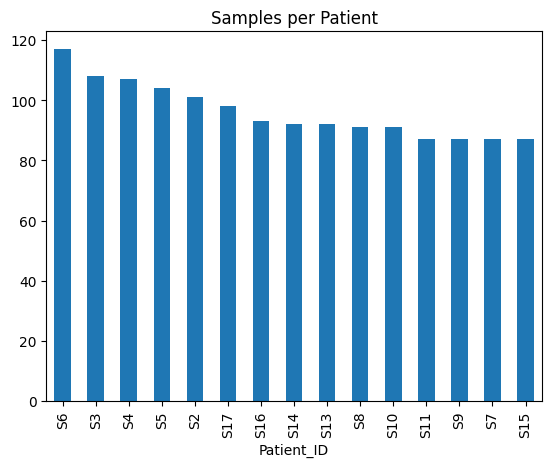

In [24]:
df['Patient_ID'].value_counts().plot(kind='bar', title='Samples per Patient')


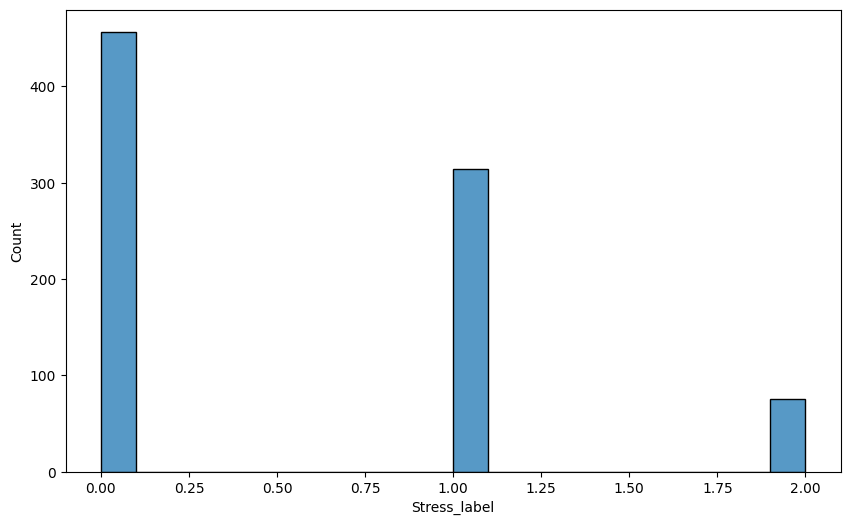

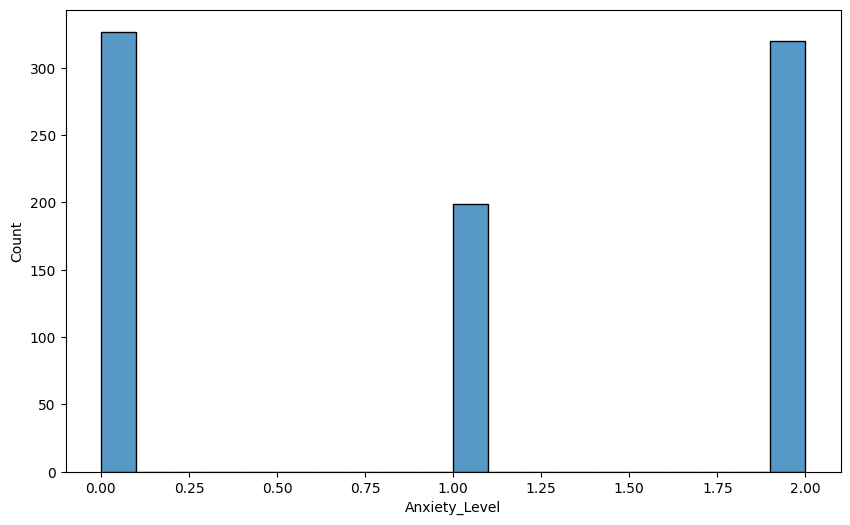

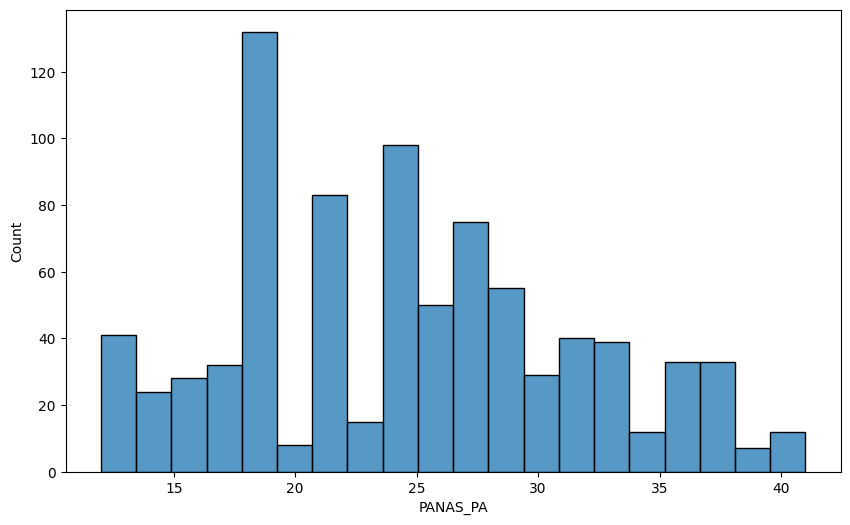

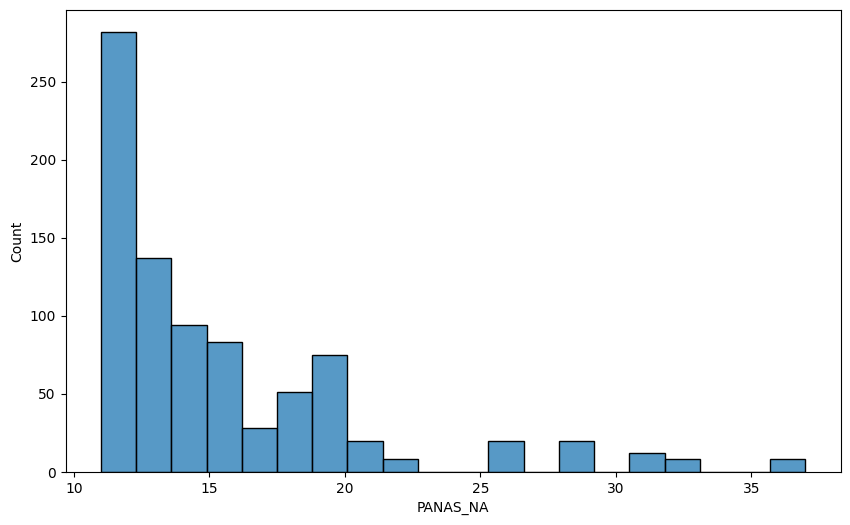

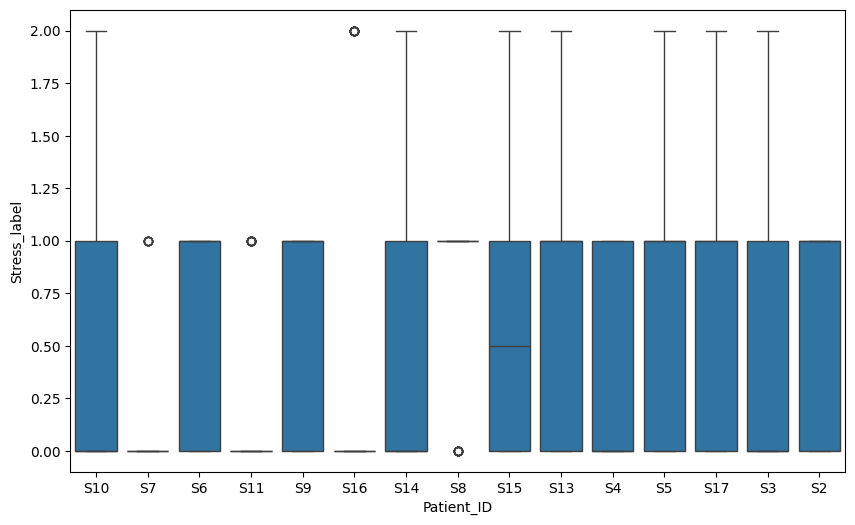

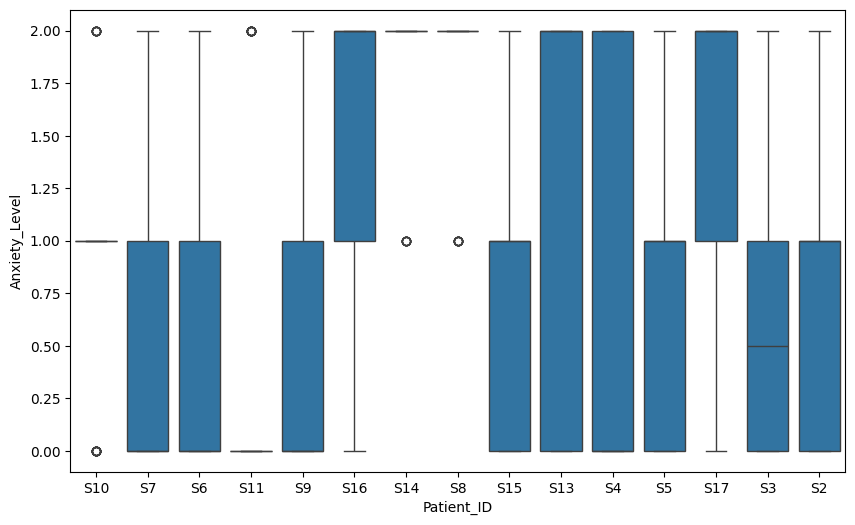

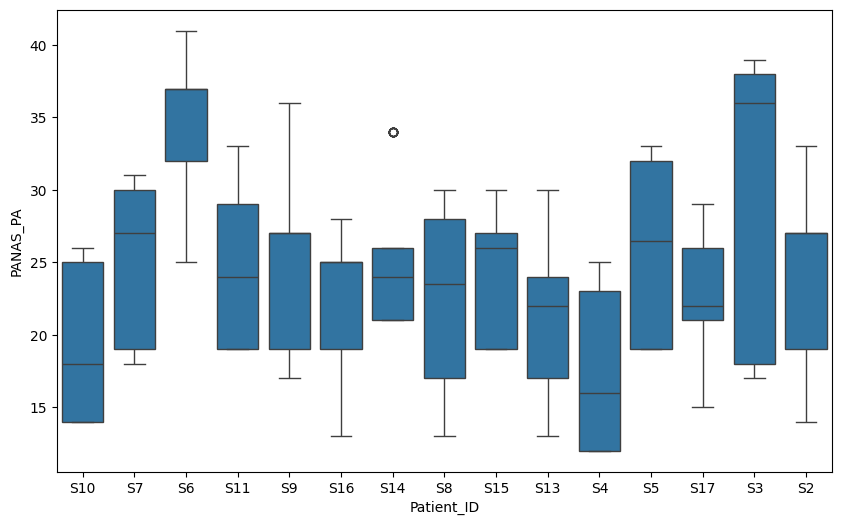

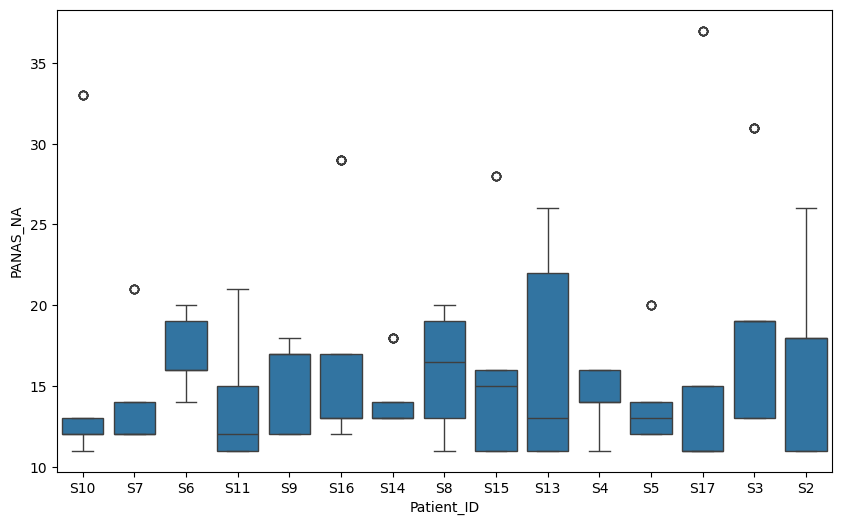

In [26]:
targets= ['Stress_label', 'Anxiety_Level', 'PANAS_PA', 'PANAS_NA']
for target in targets:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target], bins=20)
    plt.show()

for target in targets:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Patient_ID', y=target, data=df)
    plt.show()



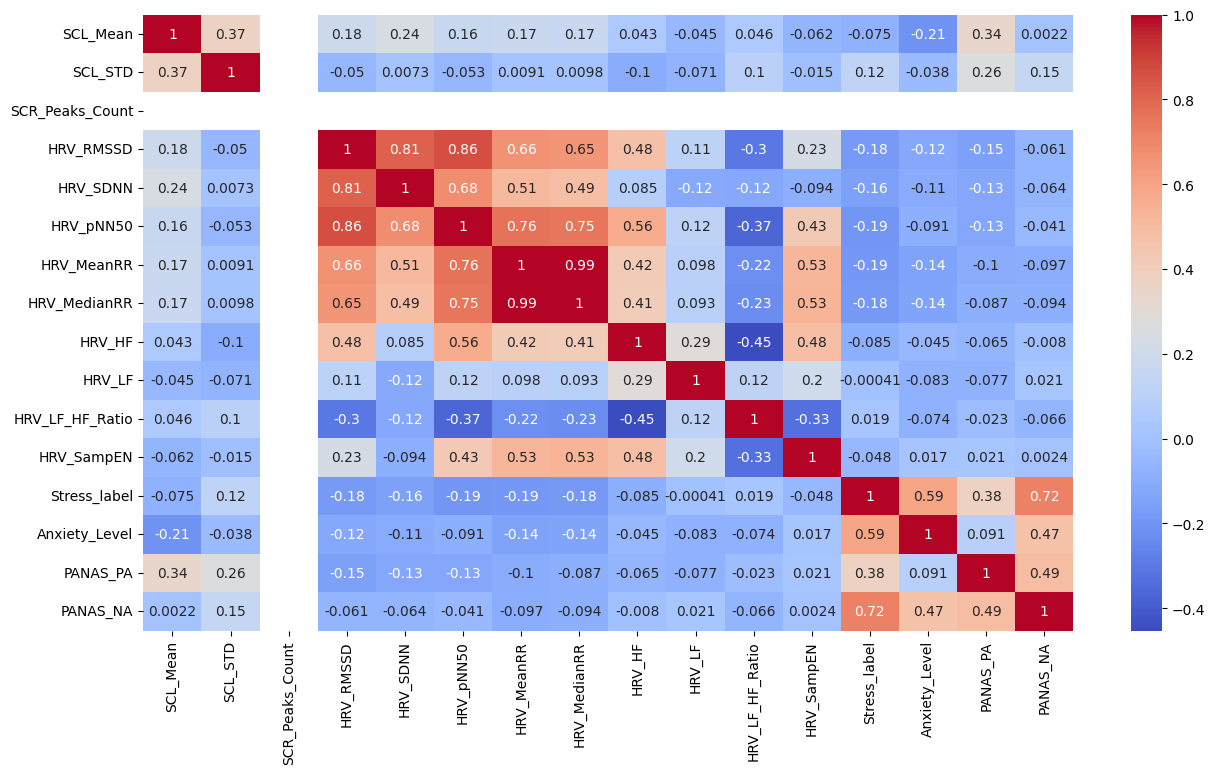

In [27]:
feature_cols = [
    'SCL_Mean', 'SCL_STD', 'SCR_Peaks_Count',
    'HRV_RMSSD', 'HRV_SDNN', 'HRV_pNN50',
    'HRV_MeanRR', 'HRV_MedianRR', 'HRV_HF',
    'HRV_LF', 'HRV_LF_HF_Ratio', 'HRV_SampEN'
]
plt.figure(figsize=(15, 8))
sns.heatmap(df[feature_cols+ targets].corr(), annot=True, cmap='coolwarm')
plt.show()

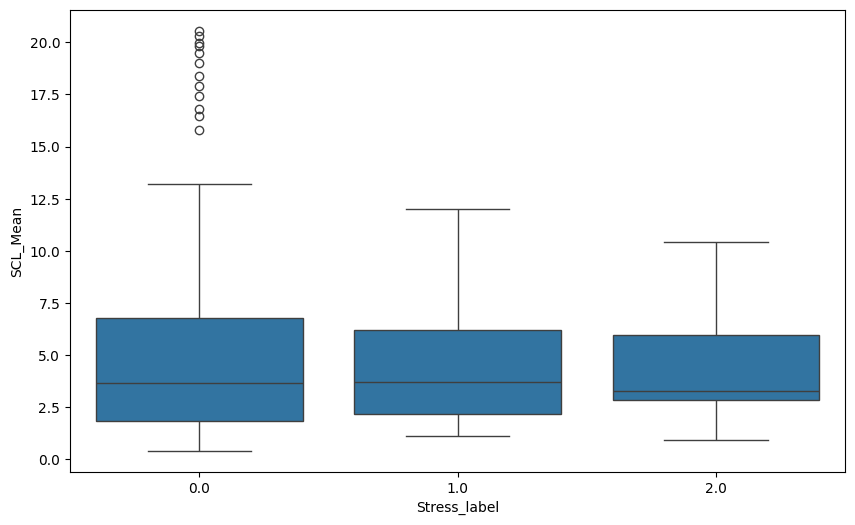

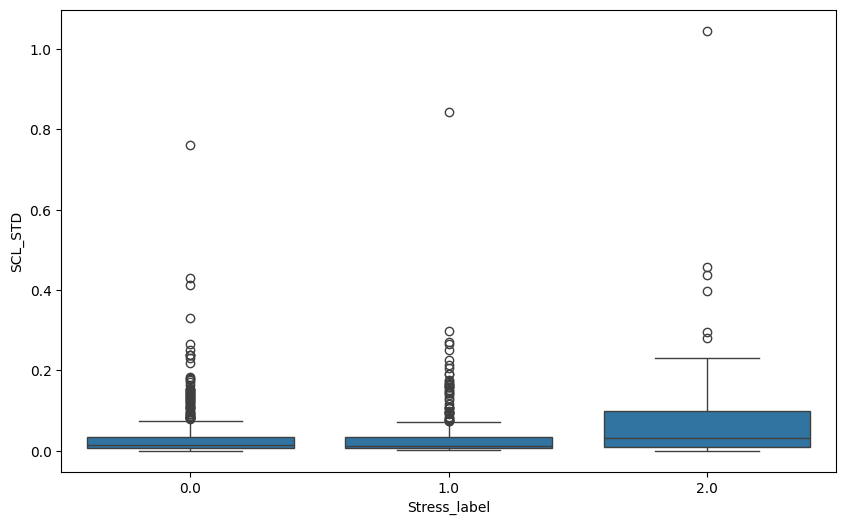

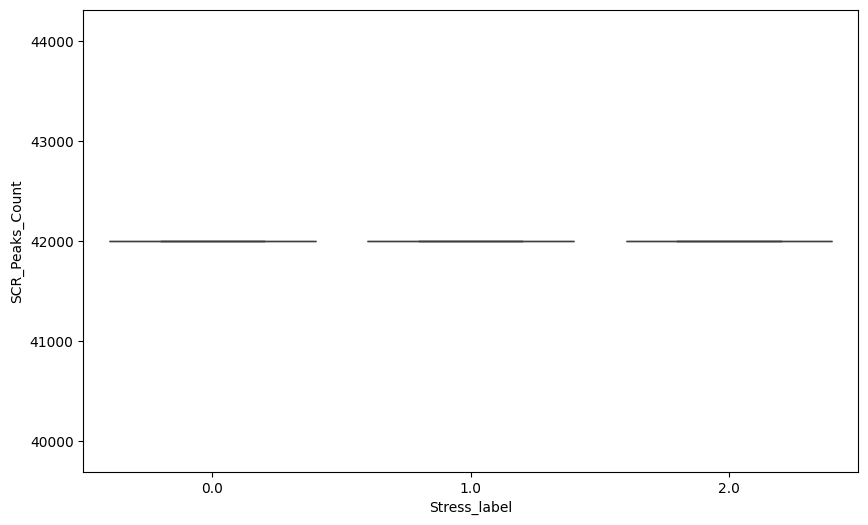

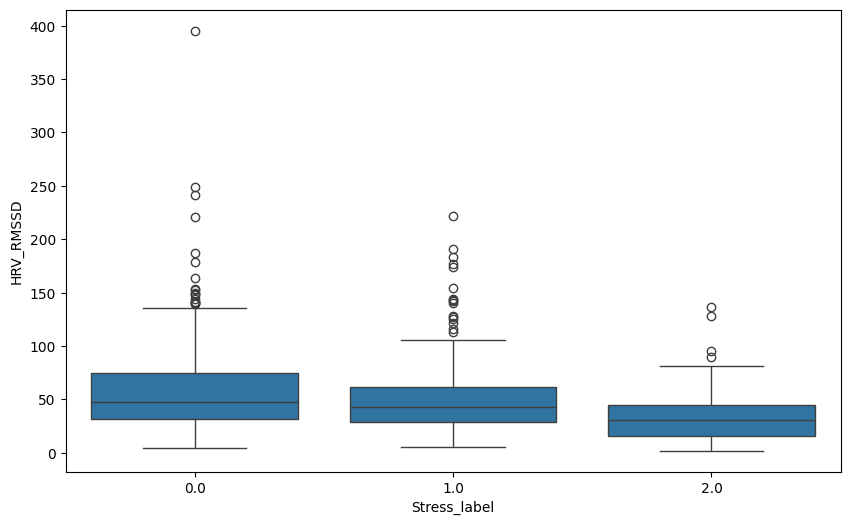

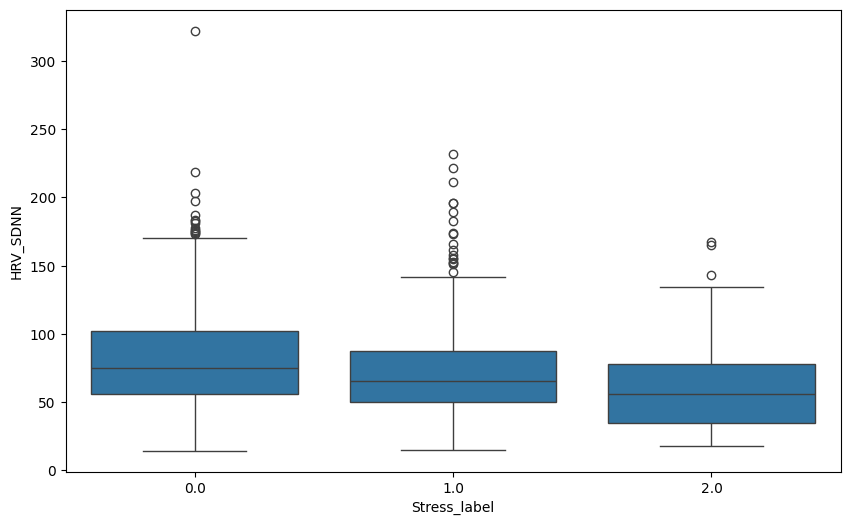

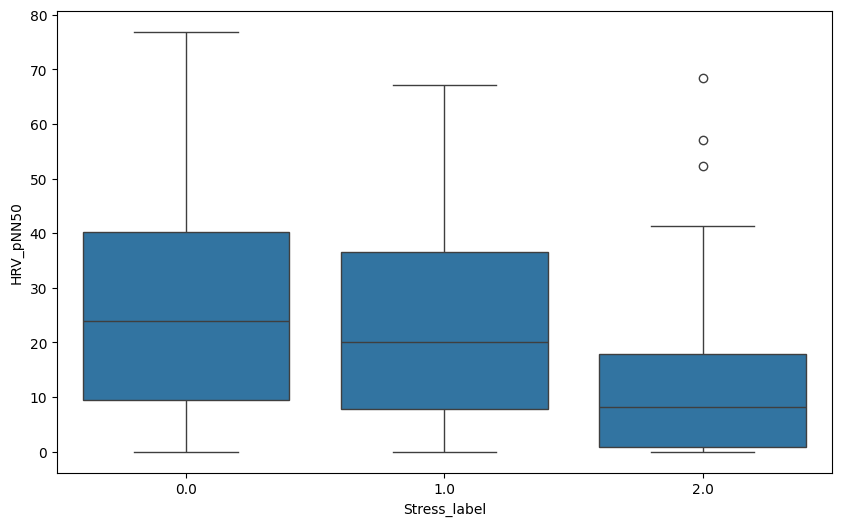

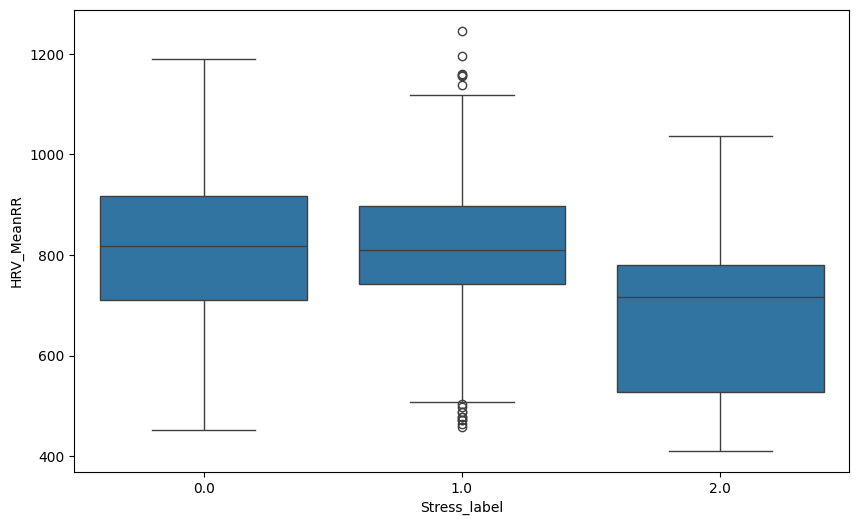

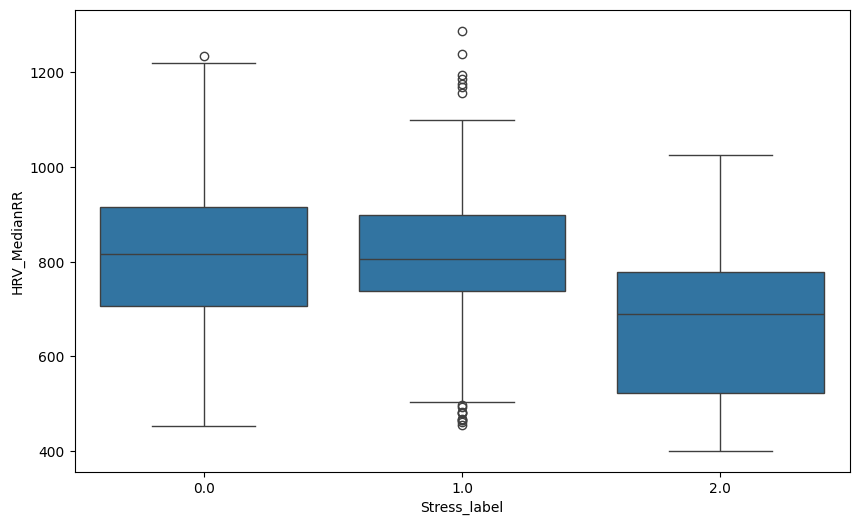

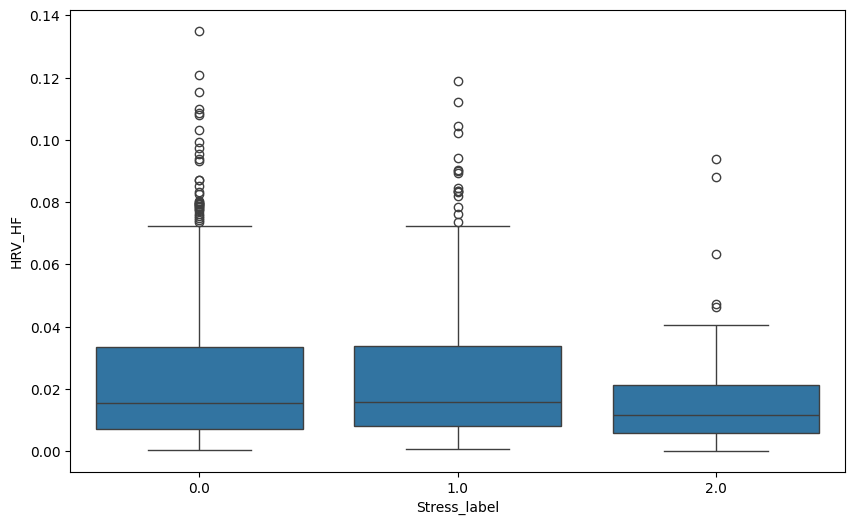

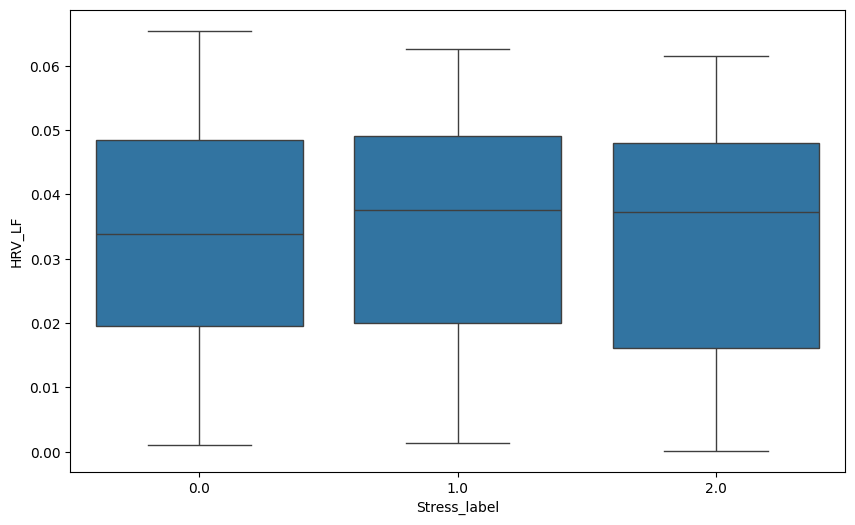

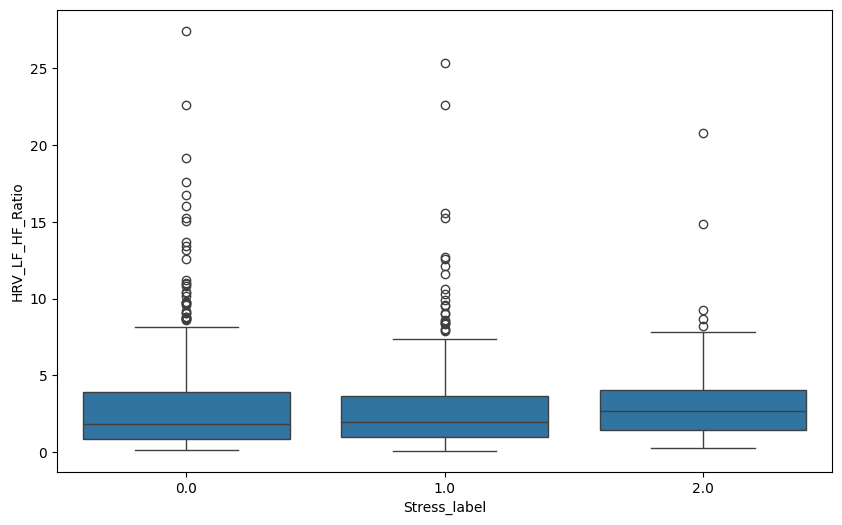

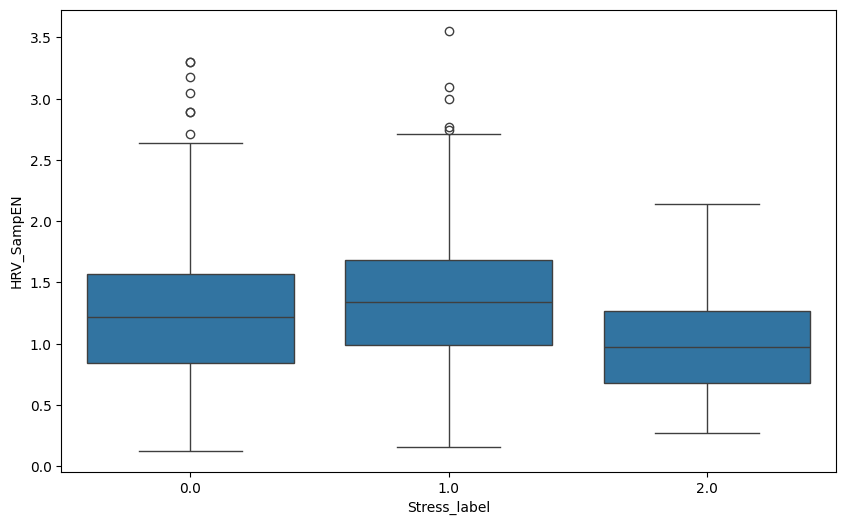

In [28]:
for feature in feature_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Stress_label', y=feature, data=df)
    plt.show()

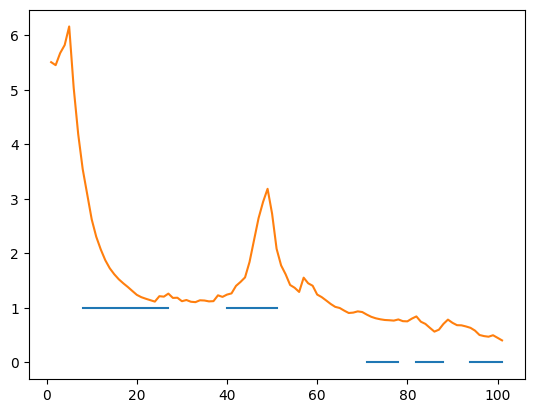

In [29]:
# Line plot example
subset = df[df['Patient_ID'] == 'S2'].sort_values('Time_Split')
plt.plot(subset['Time_Split'], subset['Stress_label'], label='Stress_label')
plt.plot(subset['Time_Split'], subset['SCL_Mean'], label='SCL_Mean')


In [30]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 700x500 with 0 Axes>

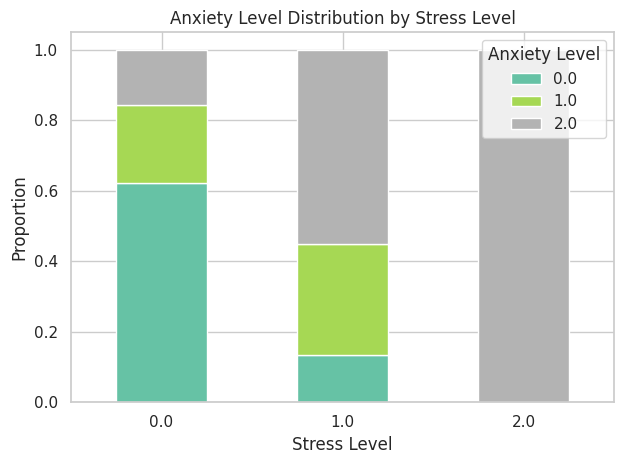

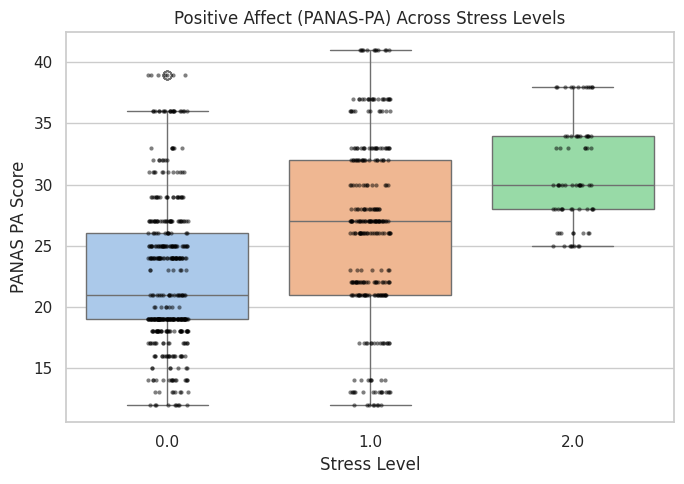

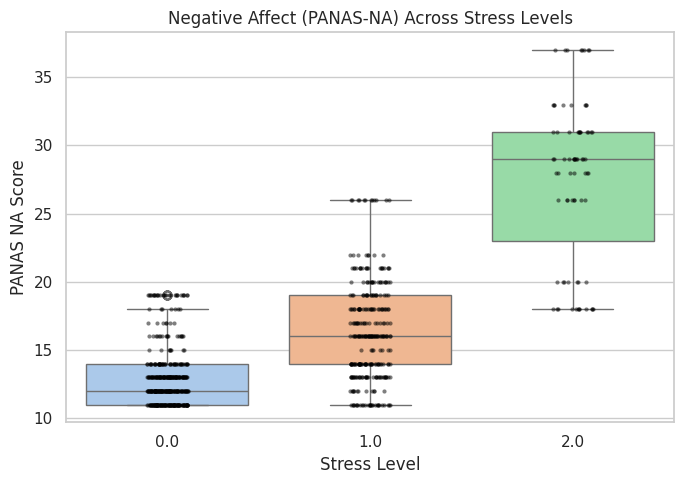

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Load data if not already
df1 = pd.read_csv("/content/drive/MyDrive/Capstone/labeled_patient_eda_hrv_features_60s.csv")
df1 = df1.drop(columns="HRV_SDANN")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()


# Set Seaborn style
sns.set(style="whitegrid")

# ----- Plot 1: Categorical Target: Anxiety_Level -----
plt.figure(figsize=(7, 5))
anxiety_counts = pd.crosstab(df1['Stress_label'], df1['Anxiety_Level'], normalize='index')  # percent
anxiety_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Anxiety Level Distribution by Stress Level")
plt.ylabel("Proportion")
plt.xlabel("Stress Level")
plt.legend(title="Anxiety Level", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ----- Plot 2: Continuous Target: PANAS_PA -----
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x='Stress_label', y='PANAS_PA', data=df1, palette='pastel', hue="Stress_label", legend=False)
sns.stripplot(x='Stress_label', y='PANAS_PA', data=df1, color='black', size=3, jitter=True, alpha=0.5)
ax.set_title("Positive Affect (PANAS-PA) Across Stress Levels")
ax.set_xlabel("Stress Level")
ax.set_ylabel("PANAS PA Score")
plt.tight_layout()
plt.show()

# ----- Plot 3: Continuous Target: PANAS_NA -----
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x='Stress_label', y='PANAS_NA', data=df1, palette='pastel', hue="Stress_label", legend=False)
sns.stripplot(x='Stress_label', y='PANAS_NA', data=df1, color='black', size=3, jitter=True, alpha=0.5)
ax.set_title("Negative Affect (PANAS-NA) Across Stress Levels")
ax.set_xlabel("Stress Level")
ax.set_ylabel("PANAS NA Score")
plt.tight_layout()
plt.show()


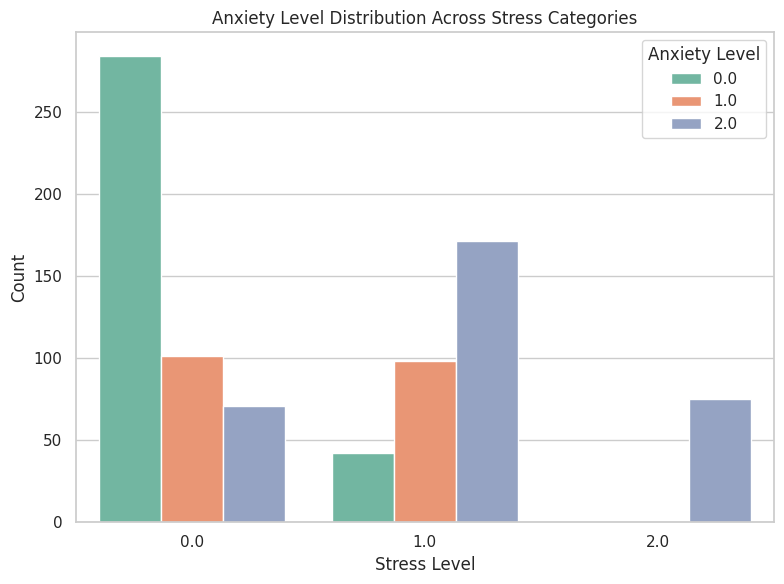

In [35]:
# -------------------------------
# 1. Categorical: Anxiety vs Stress
# -------------------------------
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df1, x="Stress_label", hue="Anxiety_Level", palette="Set2")
ax.set_title("Anxiety Level Distribution Across Stress Categories")
ax.set_xlabel("Stress Level")
ax.set_ylabel("Count")
plt.legend(title="Anxiety Level")
plt.tight_layout()
plt.show()

In [36]:
top5features = pd.read_csv('/content/drive/MyDrive/Capstone/Feature_Importance.csv')

In [37]:
top5features= top5features[top5features['Task'] != 'PA']
top5features

,Task,Model_Type,1_Feature,2_Feature,3_Feature,4_Feature,5_Feature
0,Stress,Static,SCL_Mean,HRV_MedianRR,HRV_MeanRR,SCL_STD,HRV_RMSSD
1,Stress,Time-Series,HRV_HF_t-1,SCL_STD_t-2,HRV_MedianRR_t-2,HRV_SampEN_t-3,HRV_LF_t-2
2,Anxiety,Static,SCL_Mean,HRV_pNN50,HRV_HF,HRV_SampEN,HRV_MedianRR
3,Anxiety,Time-Series,HRV_HF_t-1,SCL_STD_t-2,SCL_Mean_t-10,SCL_Mean_t-2,HRV_LF_HF_Ratio_t-4
6,NaN,Static,SCL_Mean,HRV_HF,HRV_MeanRR,HRV_RMSSD,HRV_SDNN
7,NaN,Time-Series,HRV_HF_t-1,SCR_Peaks_Count_t-1,SCL_Mean_t-1,HRV_LF_HF_Ratio_t-8,HRV_pNN50_t-9


<ipython-input-38-97596271f8b7>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




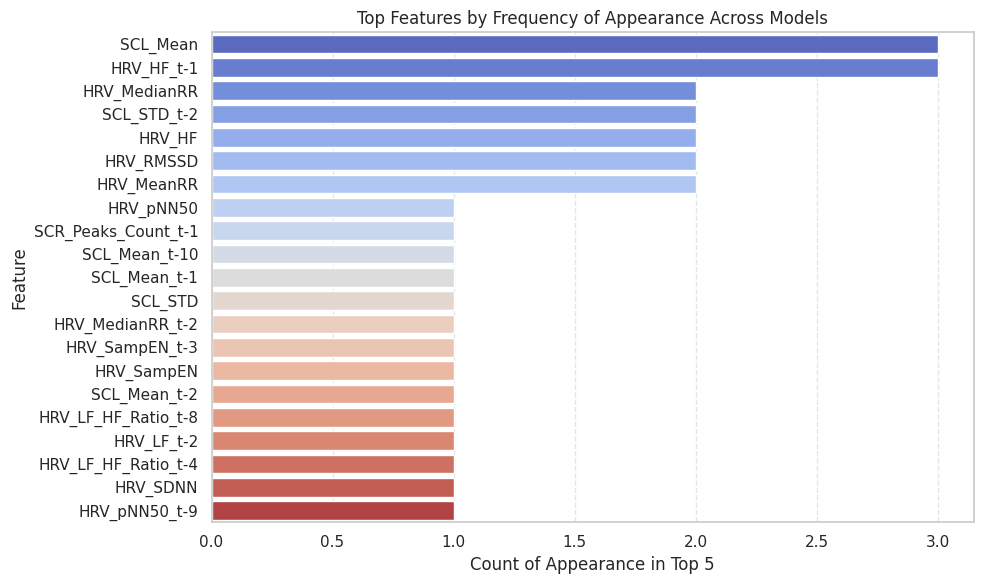

In [38]:
# Update column names in melt function based on actual headers
long_df = top5features.melt(id_vars=["Task", "Model_Type"],
                  value_vars=["1_Feature", "2_Feature", "3_Feature", "4_Feature", "5_Feature"],
                  var_name="Rank",
                  value_name="Feature")

# Count feature frequency across all tasks
feature_counts = long_df["Feature"].value_counts().reset_index()
feature_counts.columns = ["Feature", "Count"]

# Plot the feature importance bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_counts, y="Feature", x="Count", palette="coolwarm")
plt.title("Top Features by Frequency of Appearance Across Models")
plt.xlabel("Count of Appearance in Top 5")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


<ipython-input-39-c19b81b72940>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




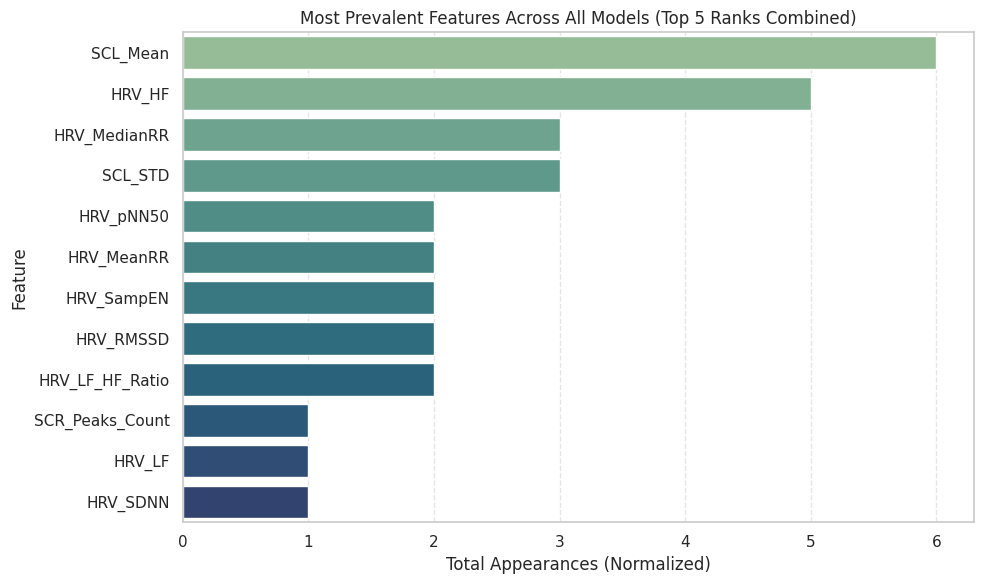

In [39]:
# Normalize time-lagged features (e.g., SCL_Mean_t-1 -> SCL_Mean) for aggregated counting
def normalize_feature_name(feature):
    return feature.split('_t')[0] if '_t' in feature else feature

# Apply normalization
long_df["Normalized_Feature"] = long_df["Feature"].apply(normalize_feature_name)

# Count occurrences of each normalized feature
normalized_feature_counts = long_df["Normalized_Feature"].value_counts().reset_index()
normalized_feature_counts.columns = ["Feature", "Count"]

# Plot the aggregated bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=normalized_feature_counts, y="Feature", x="Count", palette="crest")
plt.title("Most Prevalent Features Across All Models (Top 5 Ranks Combined)")
plt.xlabel("Total Appearances (Normalized)")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


<Figure size 1200x700 with 0 Axes>

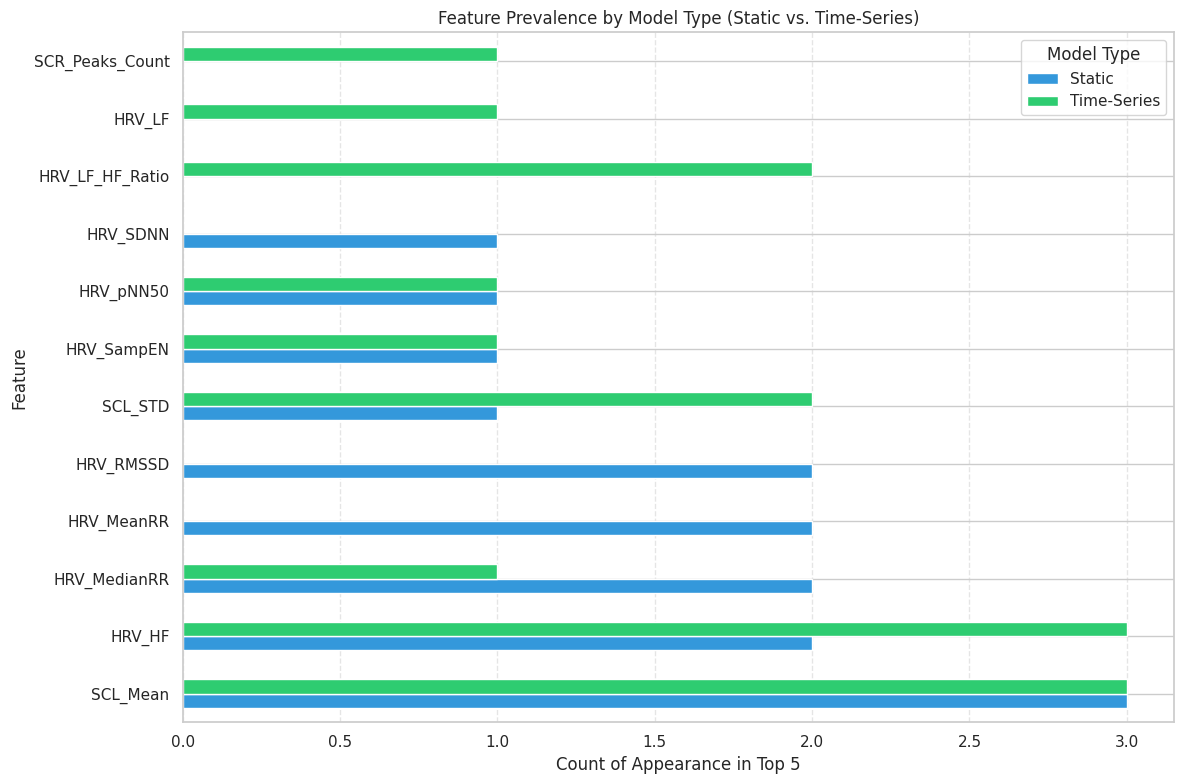

In [40]:
# Group by Model_Type and Normalized Feature to compare Static vs Time-Series
feature_model_counts = long_df.groupby(["Model_Type", "Normalized_Feature"]).size().reset_index(name="Count")

# Pivot for side-by-side comparison
feature_model_pivot = feature_model_counts.pivot(index="Normalized_Feature", columns="Model_Type", values="Count").fillna(0)

# Plot grouped bar chart
feature_model_pivot = feature_model_pivot.sort_values(by=["Static", "Time-Series"], ascending=False)

plt.figure(figsize=(12, 7))
feature_model_pivot.plot(kind="barh", stacked=False, figsize=(12, 8), color=["#3498db", "#2ecc71"])
plt.title("Feature Prevalence by Model Type (Static vs. Time-Series)")
plt.xlabel("Count of Appearance in Top 5")
plt.ylabel("Feature")
plt.legend(title="Model Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


<Figure size 1400x800 with 0 Axes>

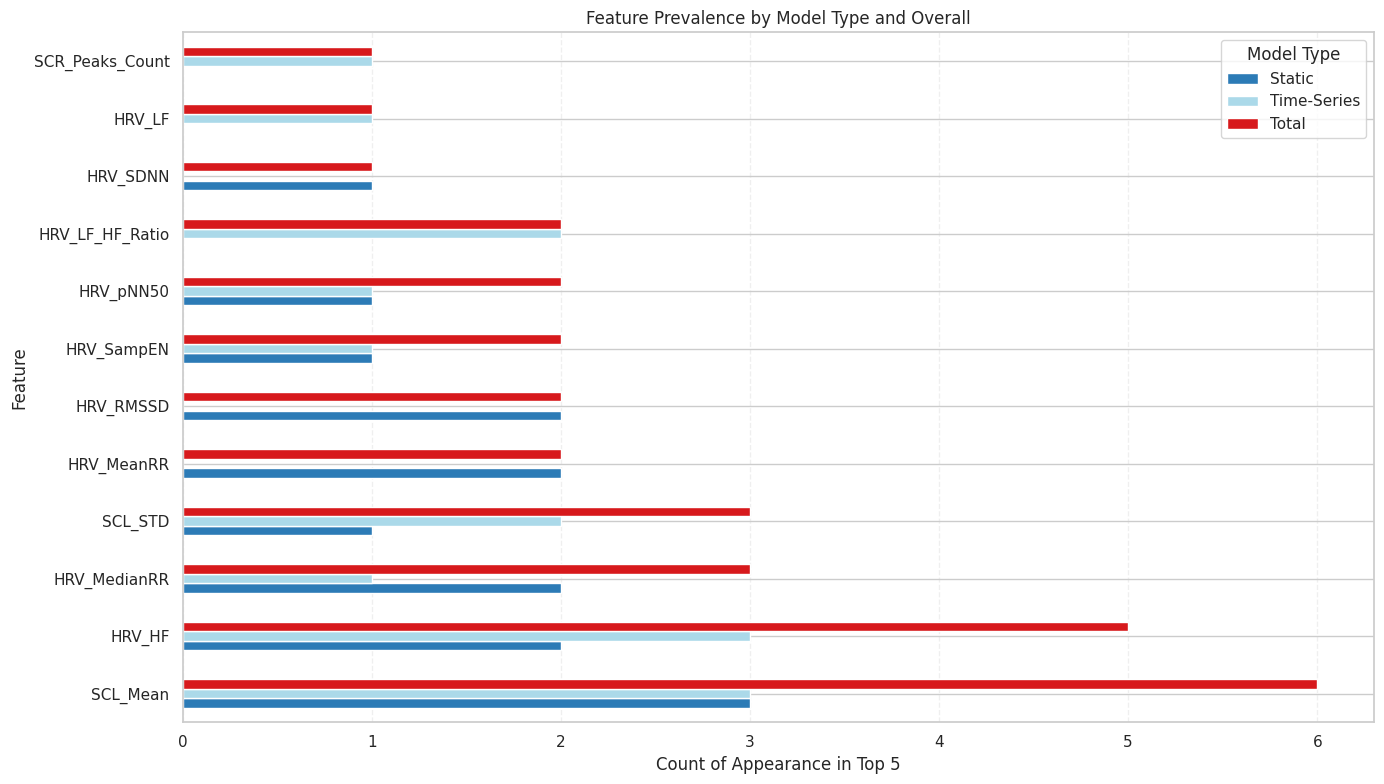

In [41]:
# First, add an overall "Total" column
feature_model_pivot["Total"] = feature_model_pivot["Static"] + feature_model_pivot["Time-Series"]

# Reorder columns for better plotting: Static, Time-Series, Total
feature_model_pivot = feature_model_pivot[["Static", "Time-Series", "Total"]]

# Sort by Total
feature_model_pivot = feature_model_pivot.sort_values(by="Total", ascending=False)

# Plot with three bars: Static, Time-Series, and Total
plt.figure(figsize=(14, 8))
feature_model_pivot.plot(kind="barh", stacked=False, figsize=(14, 8),
                         color=["#2c7bb6", "#abd9e9", "#d7191c"])
plt.title("Feature Prevalence by Model Type and Overall")
plt.xlabel("Count of Appearance in Top 5")
plt.ylabel("Feature")
plt.legend(title="Model Type")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()
